In [1]:
import sys
import os
import json
# Add the path to the utils folder
sys.path.append(os.path.abspath('../../.'))

In [2]:
from utils.cifar_utils import visualize_images, visualize_attention
from utils.model_utils import load_experiment
from utils.yaml_utils import load_yaml_config
from downloads.download_cifar import prepare_data

from models.vit import ViTForClassfication


In [3]:
with open("../../experiments/Vits/config.json", 'r') as f:
    config = json.load(f)
print(config)
model = ViTForClassfication(config)


{'attention_probs_dropout_prob': 0.0, 'hidden_dropout_prob': 0.0, 'hidden_size': 48, 'image_size': 32, 'initializer_range': 0.02, 'intermediate_size': 192, 'num_attention_heads': 4, 'num_channels': 3, 'num_classes': 10, 'num_hidden_layers': 4, 'patch_size': 4, 'qkv_bias': True, 'use_faster_attention': True}


In [4]:
data_root='../../dataset'
trainloader, testloader, classes=prepare_data(root=data_root)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
images, labels = next(iter(trainloader))
print(images.size())
images=images.permute(0,2,3,1)
print(images.size())
batch_size =int(images.size()[0])


torch.Size([4, 3, 32, 32])
torch.Size([4, 32, 32, 3])


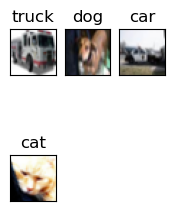

In [6]:
# Show some training images
images, labels = next(iter(trainloader))
visualize_images(batch_size, images, labels,classes)

In [7]:
# Load Experiment
config, model, train_losses, test_losses, accuracies = load_experiment("Vits",model,base_dir="../../experiments/")

/home/avsingh/Documents/aviral/Segmentation_BDD100k/utils/model_utils.py:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(cpfile))


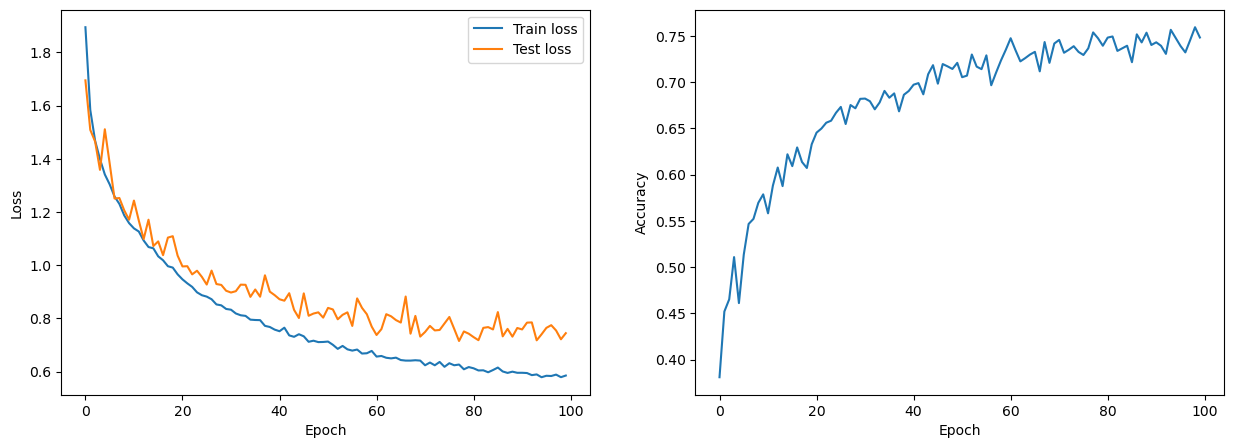

In [8]:
import matplotlib.pyplot as plt
# Create two subplots of train/test losses and accuracies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(train_losses, label="Train loss")
ax1.plot(test_losses, label="Test loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax2.plot(accuracies)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
# plt.savefig("metrics.png")
plt.show()


100%|██████████| 170498071/170498071 [00:03<00:00, 44751547.95it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


/home/avsingh/anaconda3/envs/pytorch/lib/python3.11/site-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538437738/work/torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


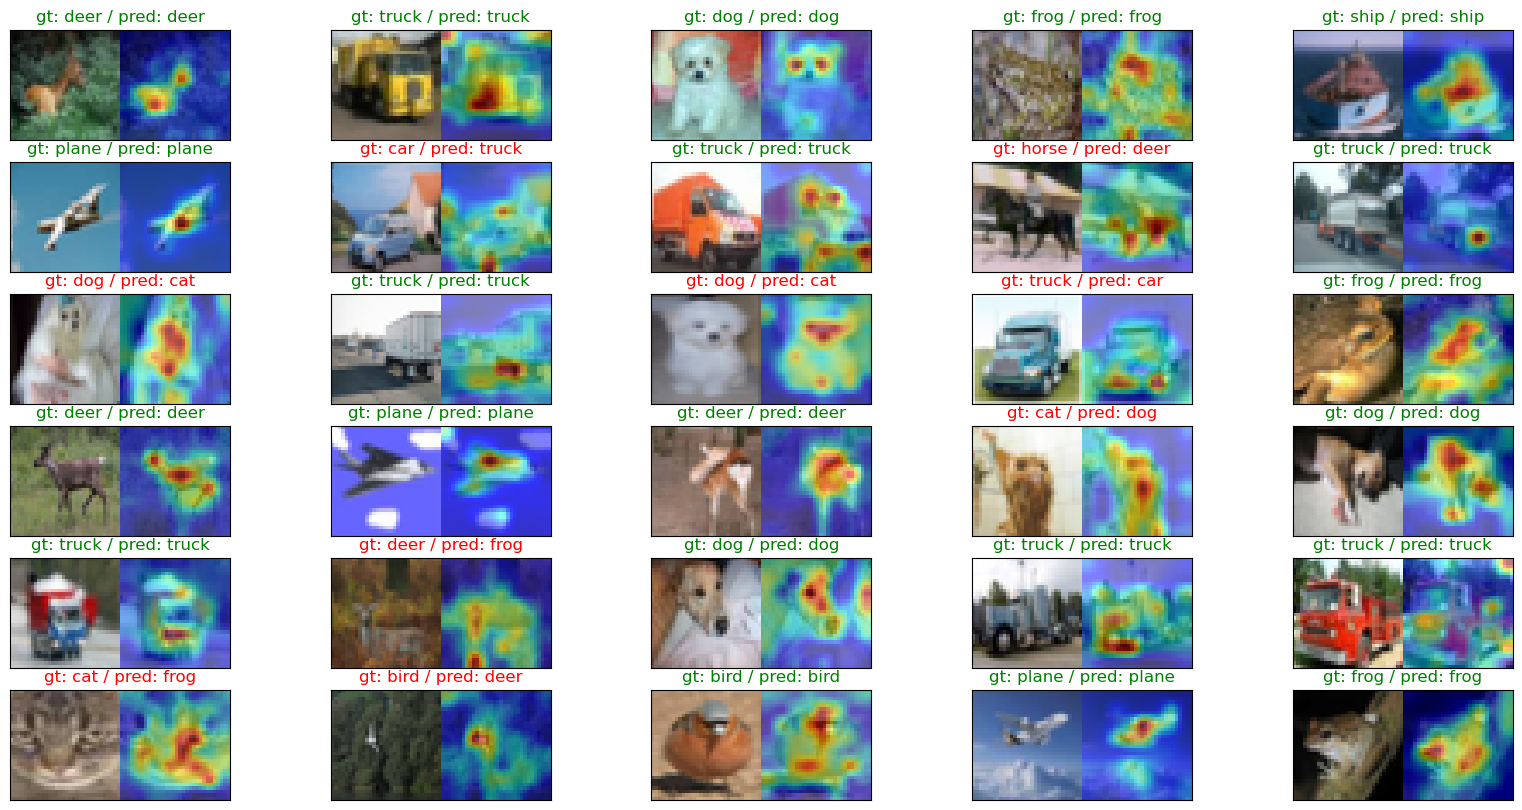

In [9]:
visualize_attention(model, test_loader, "attention.png")